In [2]:
from mcda.matrices import PerformanceTable
from mcda.scales import QuantitativeScale, PreferenceDirection
from mcda.outranking.electre import Electre3
from mcda.outranking.promethee import Promethee1, Promethee2
import numpy as np
from mcda.functions import VShapeFunction
from mcda.relations import PreferenceStructure
from helper_functions import dict_to_matrix, dict_to_matrix_with_prefix, net_flow_score, net_flow_score_pos_neg, create_preference_matrix, outranking_ranking, resolve_matrix_preferences, visualize_outranking

from new_methods.crisp_partial import crisp_partial
from new_methods.electre_partial import electre_partial
from new_methods.promethee_partial import promethee_partial

from new_methods.crisp_complete import crisp_complete
from new_methods.electre_complete import electre_complete
from new_methods.promethee_complete import promethee_complete
from hassediagram import plot_hasse


In [3]:
labels = ["A1", "A2", "A3", "A4", "A5", "A6", "A7"]
weights = [8, 4, 7, 2, 5]

In [4]:
# Definicja alternatyw
alternatives = [
    "A1",
    "A2",
    "A3",
    "A4",
    "A5",
    "A6",
    "A7"
]

# Definicja skali dla każdego kryterium
scales = {
    0: QuantitativeScale(1000, 4000, preference_direction=PreferenceDirection.MIN),# Price 
    1: QuantitativeScale(32, 1024, preference_direction=PreferenceDirection.MAX),    # Memory Size
    2: QuantitativeScale(8, 120, preference_direction=PreferenceDirection.MAX),     # Camera 
    3: QuantitativeScale(0, 5, preference_direction=PreferenceDirection.MAX),      # Functionalities 
    4: QuantitativeScale(12, 32, preference_direction=PreferenceDirection.MAX),      # Battery life
}

dataset = PerformanceTable(
    [[2200, 128, 120, 3, 16], [2800, 128, 16, 4, 28], [1200, 256, 120, 4, 12], [3400, 64, 16, 3, 24], [1600, 256, 32, 2, 20], [1000, 64, 32, 4, 26], [3200, 128, 64, 4, 22]],
    alternatives=alternatives, scales=scales
)
# Wagi kryteriów
W = {
    0: weights[0],  # Price 
    1: weights[1],   # Memory Size
    2: weights[2],  # Camera 
    3: weights[3],  # Functionalities 
    4: weights[4]   # Battery life
}



preference_func_list = {0: VShapeFunction(p=600, q=300),
                        1: VShapeFunction(p=128, q=64),
                        2: VShapeFunction(p=32, q=12),
                        3: VShapeFunction(p=3, q=2),
                        4: VShapeFunction(p=6, q=2)}

In [5]:
promethee1 = Promethee1(dataset, W, preference_func_list)
promethee2 = Promethee2(dataset, W, preference_func_list)

In [6]:
promethee_matrix = promethee1.preferences(promethee1.partial_preferences()).data

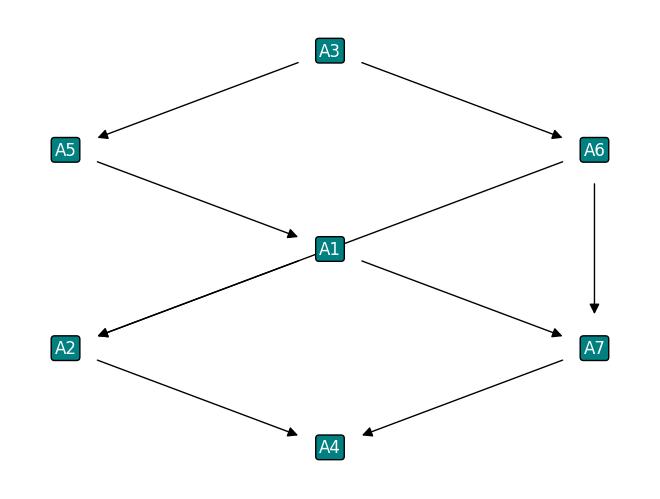

In [15]:
plot_hasse(promethee1.rank().outranking_matrix.data.values, labels)

In [9]:
promethee2.rank().data

A1    0.269231
A2   -1.178205
A3    2.391026
A4   -2.376923
A5    0.697436
A6    1.203846
A7   -1.006410
dtype: float64

# relacje

In [6]:
promethee_matrix

,A1,A2,A3,A4,A5,A6,A7
A1,0.000000,0.576923,0.096154,0.576923,0.269231,0.269231,0.576923
A2,0.192308,0.000000,0.192308,0.403846,0.192308,0.000000,0.294872
A3,0.461538,0.730769,0.000000,0.730769,0.371795,0.423077,0.730769
A4,0.192308,0.000000,0.192308,0.000000,0.096154,0.000000,0.000000
A5,0.557692,0.515385,0.192308,0.515385,0.000000,0.153846,0.461538
A6,0.500000,0.361538,0.192308,0.361538,0.500000,0.000000,0.403846
A7,0.192308,0.269231,0.192308,0.269231,0.269231,0.269231,0.000000


In [7]:
credibility = promethee_matrix
reversed_matrix = credibility.T

positive_preference_matrix = np.minimum(credibility, 1 - reversed_matrix)
negative_preference_matrix = np.minimum(1 - credibility, reversed_matrix)
indifference_matrix = np.minimum(credibility, reversed_matrix)
incomparible_matrix = np.minimum(1 - credibility, 1 - reversed_matrix)

In [8]:
positive_preference_matrix

,A1,A2,A3,A4,A5,A6,A7
A1,0.000000,0.576923,0.096154,0.576923,0.269231,0.269231,0.576923
A2,0.192308,0.000000,0.192308,0.403846,0.192308,0.000000,0.294872
A3,0.461538,0.730769,0.000000,0.730769,0.371795,0.423077,0.730769
A4,0.192308,0.000000,0.192308,0.000000,0.096154,0.000000,0.000000
A5,0.557692,0.515385,0.192308,0.515385,0.000000,0.153846,0.461538
A6,0.500000,0.361538,0.192308,0.361538,0.500000,0.000000,0.403846
A7,0.192308,0.269231,0.192308,0.269231,0.269231,0.269231,0.000000


In [9]:
negative_preference_matrix

,A1,A2,A3,A4,A5,A6,A7
A1,0.000000,0.192308,0.461538,0.192308,0.557692,0.500000,0.192308
A2,0.576923,0.000000,0.730769,0.000000,0.515385,0.361538,0.269231
A3,0.096154,0.192308,0.000000,0.192308,0.192308,0.192308,0.192308
A4,0.576923,0.403846,0.730769,0.000000,0.515385,0.361538,0.269231
A5,0.269231,0.192308,0.371795,0.096154,0.000000,0.500000,0.269231
A6,0.269231,0.000000,0.423077,0.000000,0.153846,0.000000,0.269231
A7,0.576923,0.294872,0.730769,0.000000,0.461538,0.403846,0.000000


In [10]:
indifference_matrix

,A1,A2,A3,A4,A5,A6,A7
A1,0.000000,0.192308,0.096154,0.192308,0.269231,0.269231,0.192308
A2,0.192308,0.000000,0.192308,0.000000,0.192308,0.000000,0.269231
A3,0.096154,0.192308,0.000000,0.192308,0.192308,0.192308,0.192308
A4,0.192308,0.000000,0.192308,0.000000,0.096154,0.000000,0.000000
A5,0.269231,0.192308,0.192308,0.096154,0.000000,0.153846,0.269231
A6,0.269231,0.000000,0.192308,0.000000,0.153846,0.000000,0.269231
A7,0.192308,0.269231,0.192308,0.000000,0.269231,0.269231,0.000000


In [11]:
incomparible_matrix

,A1,A2,A3,A4,A5,A6,A7
A1,1.000000,0.423077,0.538462,0.423077,0.442308,0.500000,0.423077
A2,0.423077,1.000000,0.269231,0.596154,0.484615,0.638462,0.705128
A3,0.538462,0.269231,1.000000,0.269231,0.628205,0.576923,0.269231
A4,0.423077,0.596154,0.269231,1.000000,0.484615,0.638462,0.730769
A5,0.442308,0.484615,0.628205,0.484615,1.000000,0.500000,0.538462
A6,0.500000,0.638462,0.576923,0.638462,0.500000,1.000000,0.596154
A7,0.423077,0.705128,0.269231,0.730769,0.538462,0.596154,1.000000


# partial

In [12]:
new_promethee_partial = promethee_partial(promethee_matrix.values)


Restricted license - for non-production use only - expires 2026-11-23


c:\Users\Jurek\Desktop\Doktorat\nowe_repo\new_methods\promethee_partial.py:59: DeprecationWarning: Model.display() is deprecated
  m.display()


In [13]:
new_promethee_partial['objective_value']

25.24871794871795

In [14]:
dict_to_matrix(new_promethee_partial['solution_R']).astype(int)

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1]])

In [15]:
dict_to_matrix_with_prefix(new_promethee_partial['solution_P_minus']).astype(int)

array([[1, 0, 1, 0, 1, 1, 0],
       [1, 1, 1, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 0, 1, 0, 1, 1, 1]])

In [16]:
dict_to_matrix_with_prefix(new_promethee_partial['solution_P_plus']).astype(int)

array([[1, 1, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [1, 1, 0, 1, 1, 0, 1],
       [1, 1, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 1]])

In [17]:
dict_to_matrix(new_promethee_partial['solution_I']).astype(int)

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 1, 0],
       [0, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 1]])

In [18]:
dict_to_matrix(new_promethee_partial['solution_r']).astype(int)

array([[1, 1, 0, 1, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 1, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 1, 0, 0, 1]])

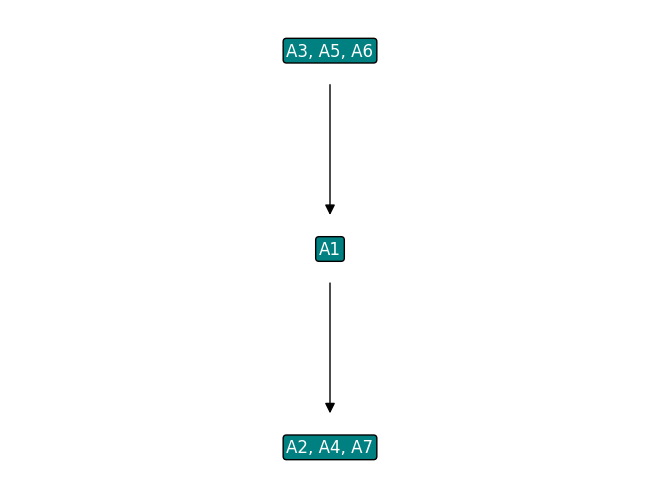

In [19]:
plot_hasse(dict_to_matrix(new_promethee_partial['solution_r']).astype(int), labels)

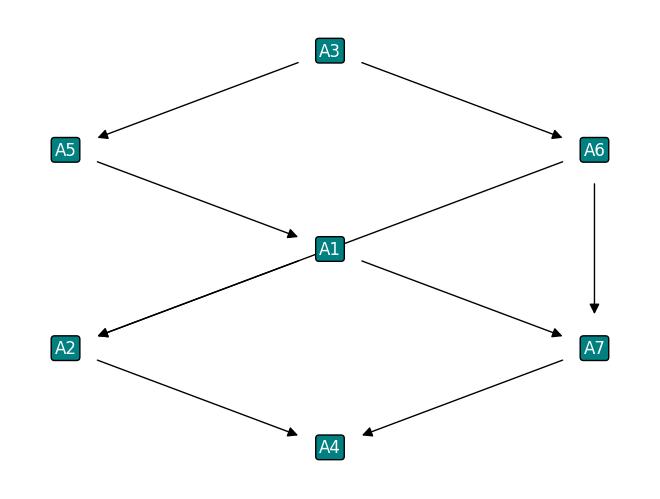

In [16]:
plot_hasse(promethee1.rank().outranking_matrix.data.values, labels)

# complete

In [20]:
new_promethee_complete = promethee_complete(promethee_matrix.values)

c:\Users\Jurek\Desktop\Doktorat\nowe_repo\new_methods\promethee_complete.py:46: DeprecationWarning: Model.display() is deprecated
  m.display()


In [21]:
new_promethee_complete['objective_value']

25.24871794871795

In [22]:
dict_to_matrix(new_promethee_complete['solution_z']).astype(int)

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 1, 0],
       [0, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 1]])

In [23]:
dict_to_matrix(new_promethee_complete['solution_r']).astype(int)

array([[1, 1, 0, 1, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 1, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 1, 0, 0, 1]])

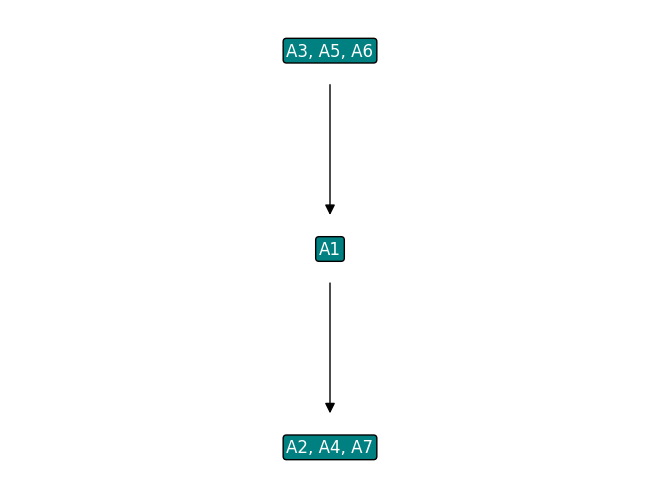

In [24]:
plot_hasse(dict_to_matrix(new_promethee_complete['solution_r']).astype(int), labels)

# zestawienie

In [25]:
import pandas as pd

# partial

In [26]:
#P+
p_plus = pd.DataFrame(np.multiply(positive_preference_matrix, dict_to_matrix_with_prefix(new_promethee_partial['solution_P_plus']).astype(int)));p_plus

,A1,A2,A3,A4,A5,A6,A7
A1,0.000000,0.576923,0.0,0.576923,0.0,0.0,0.576923
A2,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
A3,0.461538,0.730769,0.0,0.730769,0.0,0.0,0.730769
A4,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
A5,0.557692,0.515385,0.0,0.515385,0.0,0.0,0.461538
A6,0.500000,0.361538,0.0,0.361538,0.0,0.0,0.403846
A7,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000


In [27]:
#P-
p_minus = pd.DataFrame(np.multiply(negative_preference_matrix, dict_to_matrix_with_prefix(new_promethee_partial['solution_P_minus']).astype(int)));p_minus

,A1,A2,A3,A4,A5,A6,A7
A1,0.000000,0.0,0.461538,0.0,0.557692,0.500000,0.0
A2,0.576923,0.0,0.730769,0.0,0.515385,0.361538,0.0
A3,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
A4,0.576923,0.0,0.730769,0.0,0.515385,0.361538,0.0
A5,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
A6,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
A7,0.576923,0.0,0.730769,0.0,0.461538,0.403846,0.0


In [28]:
#I
indiff = pd.DataFrame(np.multiply(indifference_matrix, dict_to_matrix(new_promethee_partial['solution_I']).astype(int)));indiff

,A1,A2,A3,A4,A5,A6,A7
A1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
A2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.269231
A3,0.0,0.000000,0.000000,0.0,0.192308,0.192308,0.000000
A4,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
A5,0.0,0.000000,0.192308,0.0,0.000000,0.153846,0.000000
A6,0.0,0.000000,0.192308,0.0,0.153846,0.000000,0.000000
A7,0.0,0.269231,0.000000,0.0,0.000000,0.000000,0.000000


In [29]:
#R
incomp = pd.DataFrame(np.multiply(incomparible_matrix, dict_to_matrix(new_promethee_partial['solution_R']).astype(int)));incomp

,A1,A2,A3,A4,A5,A6,A7
A1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
A2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
A3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
A4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
A5,0.0,0.0,0.0,0.0,1.0,0.0,0.0
A6,0.0,0.0,0.0,0.0,0.0,1.0,0.0
A7,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
p_plus + p_minus + indiff + incomp

,A1,A2,A3,A4,A5,A6,A7
A1,1.000000,0.576923,0.461538,0.576923,0.557692,0.500000,0.576923
A2,0.576923,1.000000,0.730769,0.000000,0.515385,0.361538,0.269231
A3,0.461538,0.730769,1.000000,0.730769,0.192308,0.192308,0.730769
A4,0.576923,0.000000,0.730769,1.000000,0.515385,0.361538,0.000000
A5,0.557692,0.515385,0.192308,0.515385,1.000000,0.153846,0.461538
A6,0.500000,0.361538,0.192308,0.361538,0.153846,1.000000,0.403846
A7,0.576923,0.269231,0.730769,0.000000,0.461538,0.403846,1.000000


# complete

In [31]:
pref = pd.DataFrame(np.multiply(positive_preference_matrix, dict_to_matrix(new_promethee_complete['solution_r']).astype(int)));pref

,A1,A2,A3,A4,A5,A6,A7
A1,0.000000,0.576923,0.000000,0.576923,0.000000,0.000000,0.576923
A2,0.000000,0.000000,0.000000,0.403846,0.000000,0.000000,0.294872
A3,0.461538,0.730769,0.000000,0.730769,0.371795,0.423077,0.730769
A4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A5,0.557692,0.515385,0.192308,0.515385,0.000000,0.153846,0.461538
A6,0.500000,0.361538,0.192308,0.361538,0.500000,0.000000,0.403846
A7,0.000000,0.269231,0.000000,0.269231,0.000000,0.000000,0.000000


In [32]:
pref = pd.DataFrame(np.multiply(positive_preference_matrix, dict_to_matrix(new_promethee_complete['solution_z']).astype(int)));pref

,A1,A2,A3,A4,A5,A6,A7
A1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2,0.0,0.000000,0.000000,0.403846,0.000000,0.000000,0.294872
A3,0.0,0.000000,0.000000,0.000000,0.371795,0.423077,0.000000
A4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A5,0.0,0.000000,0.192308,0.000000,0.000000,0.153846,0.000000
A6,0.0,0.000000,0.192308,0.000000,0.500000,0.000000,0.000000
A7,0.0,0.269231,0.000000,0.269231,0.000000,0.000000,0.000000
